* This notebook was made to further look at trajectory comparisons under different conditions. With/Without wind; Default/reduced vertical viscosity; With banks/without banks and all reduced with viscosity and not.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime as dt
import pytz, datetime
import arrow
from IPython.core.display import Image
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
from __future__ import division

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

In [3]:
tracersT = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/\
SalishSea_1h_20141008_20141010_grid_T.nc')
nc_tools.show_variables(tracersT)
ssh = tracersT.variables['sossheig']
timesteps = tracersT.variables['time_counter']
nc_tools.timestamp(tracersT, 0)

[u'deptht', u'nav_lat', u'nav_lon', u'rain_rate', u'snow_rate', u'sossheig', u'time_counter', u'time_counter_bnds', u'vosaline', u'votemper']


<Arrow [2014-10-08T00:30:00+00:00]>

In [4]:
def plotoct(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    viz_tools.plot_coastline(ax1,grid,coords='map')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=4,color='FireBrick')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=20,color='OrangeRed')
    ax1.set_xlim([-123.6,-123])
    ax1.set_ylim([48.8,49.4])
    ax1.set_xticks([-123.6, -123.4, -123.2,-123])
    ax1.set_xticklabels([-123.6, -123.4, -123.2,-123])
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    ax1.scatter(lon[1:,part],lat[1:,part],color='DodgerBlue',marker='o',label='Model')
    ax1.scatter(lon[0,part],lat[0,part],color='0.30',marker='s')
    ax1.plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    ax1.legend(loc='upper left')
    
    ax2.plot(timesteps[0:48],ssh[0:48,466,329],'-k')
    
    ax2.set_xticklabels([])
    ax2.set_ylabel('Water level (m)')
    ax2.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax2.set_title('sossheig, ~Point Atkinson')
        
    t=hour
    ax2.plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')
    
    t2=hour+duration
    ax2.plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    
    [wind_speed,wind_dir,temp,time, lat, lon] = stormtools.get_EC_observations('Sandheads',start,end)
    
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    ax3.plot(time,wind_speed,'-k')
    ax3.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax3.set_xticklabels([])
    ax3.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax3.set_ylabel('Wind Speed (m/s)')
    ax3.set_title('Sandheads')
    
    diff = 24 - hour
    hour2 = duration - diff
    if hour2 > 0:
        day = day
        day2 = day + 1
        hour2 = hour2
    else:
        day = day
        day2 = day
        hour2 = hour+duration
    
    t=dt.datetime(2014,10,day,hour,minute)
    ax3.plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax3.plot([tt,tt],[0,10],'b-',label='end')
    ax3.legend(loc='upper left')

    ax4.plot(time,wind_dir,'-k')
    ax4.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax4.set_xticklabels([])
    ax4.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax4.set_ylabel('Wind Direction (deg CCW of E)')
    ax4.set_title('Sandheads')
    

    t=dt.datetime(2014,10,day,hour,minute)
    ax4.plot([t,t],[0,350],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax4.plot([tt,tt],[0,350],'b-',label='end')
    ax4.legend(loc='upper left')

In [5]:
def plotoct_mewold(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, axs = plt.subplots(2, 2, figsize=(11, 10))
    viz_tools.plot_coastline(axs[0,0],grid,coords='map')
    viz_tools.plot_coastline(axs[0,0],grid,coords='map',isobath=4,color='FireBrick')
    viz_tools.plot_coastline(axs[0,0],grid,coords='map',isobath=20,color='OrangeRed')
    axs[0,0].set_xlim([-123.6,-123])
    axs[0,0].set_ylim([48.8,49.4])
    axs[0,0].set_xticks([-123.6, -123.4, -123.2,-123])
    axs[0,0].set_xticklabels([-123.6, -123.4, -123.2,-123])
    axs[0,0].set_xlabel('Longitude')
    axs[0,0].set_ylabel('Latitude')
    
    colors=['g','DodgerBlue']
    for i, key in enumerate(lon.keys()):
        axs[0,0].scatter(lon[key][1:,part],lat[key][1:,part],marker='o',color=colors[i],label=key)
        axs[0,0].scatter(lon[key][0,part],lat[key][0,part],color='0.30',marker='s')
    axs[0,0].plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    axs[0,0].legend(loc='upper left')
    
    axs[0,1].plot(timesteps[0:48],ssh[0:48,466,329],'-k')
    
    axs[0,1].set_xticklabels([])
    axs[0,1].set_ylabel('Water level (m)')
    axs[0,1].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[0,1].set_title('sossheig, ~Point Atkinson')
        
    t=hour
    axs[0,1].plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')
    
    t2=hour+duration
    axs[0,1].plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    
    [wind_speed,wind_dir,temp,time, lat, lon] = stormtools.get_EC_observations('Sandheads',start,end)
    
    #fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    axs[1,0].plot(time,wind_speed,'-k')
    axs[1,0].set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    axs[1,0].set_xticklabels([])
    axs[1,0].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[1,0].set_ylabel('Wind Speed (m/s)')
    axs[1,0].set_title('Sandheads')
    
    diff = 24 - hour
    hour2 = duration - diff
    day2 = day +1
    
    t=dt.datetime(2014,10,day,hour,minute)
    axs[1,0].plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    axs[1,0].plot([tt,tt],[0,10],'b-',label='end')
    axs[1,0].legend(loc='upper left')

    axs[1,1].plot(time,wind_dir,'-k')
    axs[1,1].set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    axs[1,1].set_xticklabels([])
    axs[1,1].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[1,1].set_ylabel('Wind Direction (deg CCW of E)')
    axs[1,1].set_title('Sandheads')
    

    t=dt.datetime(2014,10,day,hour,minute)
    axs[1,1].plot([t,t],[0,350],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    axs[1,1].plot([tt,tt],[0,350],'b-',label='end')
    axs[1,1].legend(loc='upper left')
    return fig

# Comparison with extended and deepened river channel

* Oct8 drop1

In [6]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['new']=o112.variables['traj_lon']
lat112['new']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop1/\
12/ariane_trajectories_qualitative.nc','r')
lon112['old']=o112.variables['traj_lon']
lat112['old']=o112.variables['traj_lat']

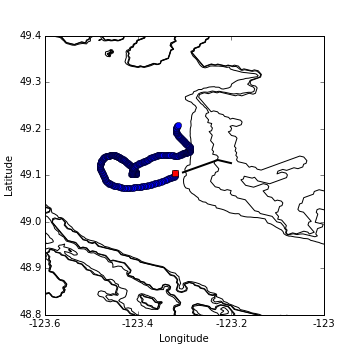

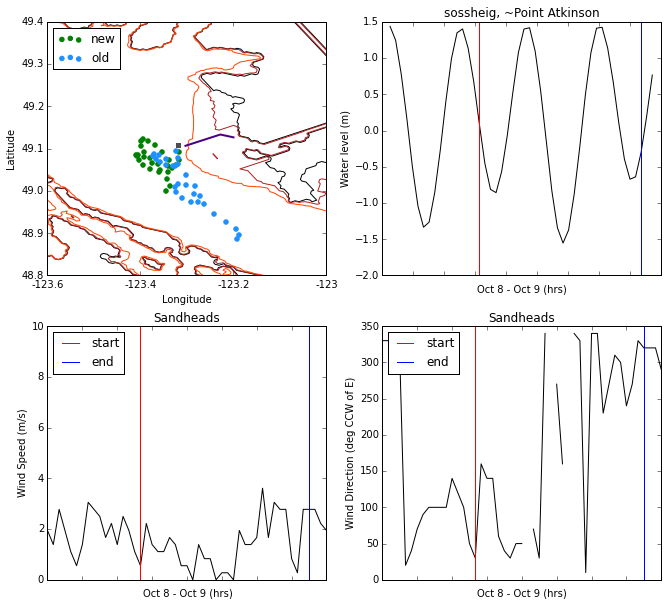

In [7]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

* Drop2

In [8]:
lon212={}; lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['new']=o212.variables['traj_lon']
lat212['new']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop2/\
12/ariane_trajectories_qualitative.nc','r')
lon212['old']=o212.variables['traj_lon']
lat212['old']=o212.variables['traj_lat']

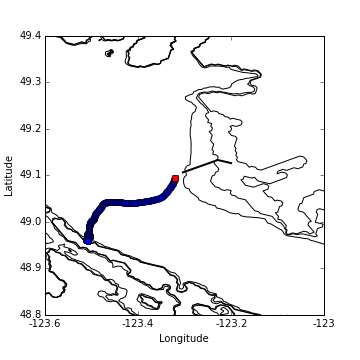

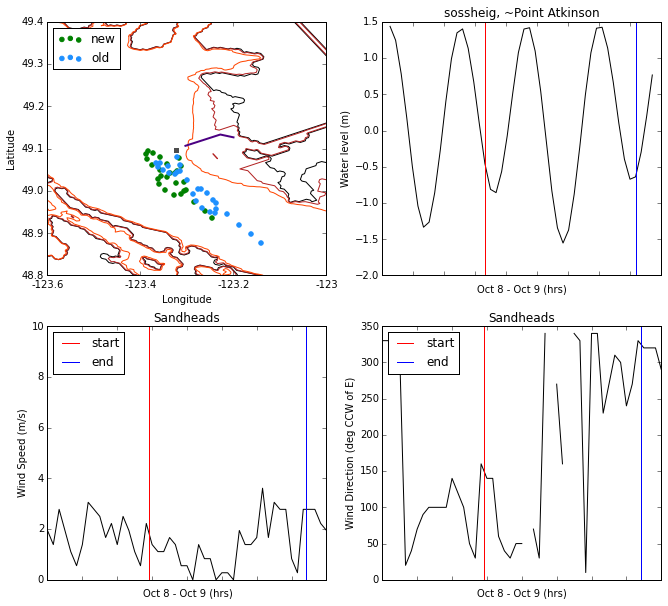

In [9]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')

# Comparison with reduced vertical eddy viscosity case from Oct8-10

In [10]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['default']=o112.variables['traj_lon']
lat112['default']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['reduced_viscosity']=o112.variables['traj_lon']
lat112['reduced_viscosity']=o112.variables['traj_lat']

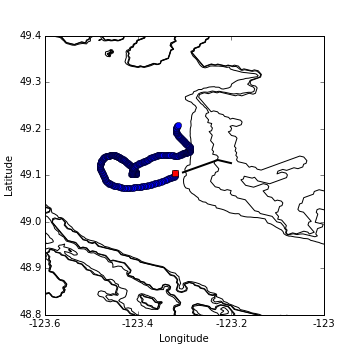

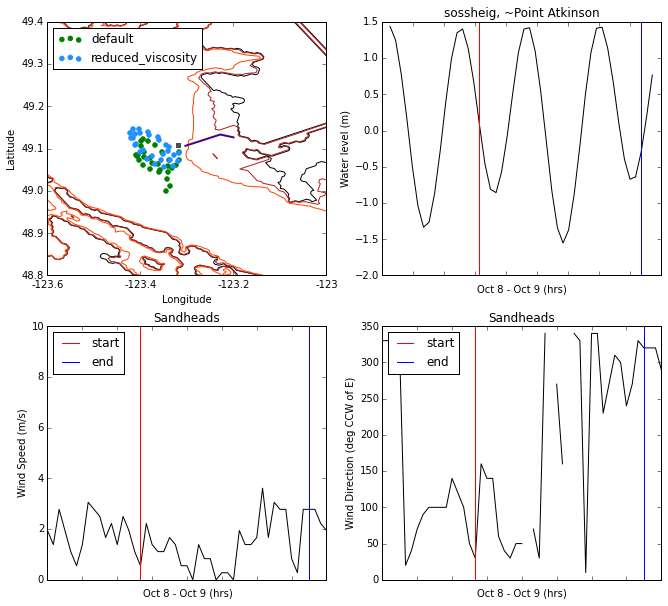

In [11]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

In [12]:
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop1/\
ariane_trajectories_qualitative.nc')
lon112=o112.variables['traj_lon']
lat112=o112.variables['traj_lat']

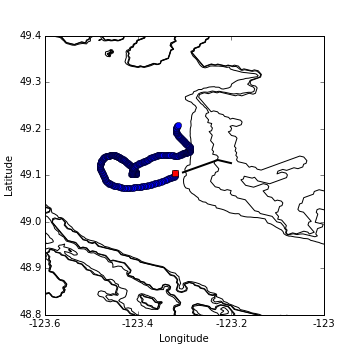

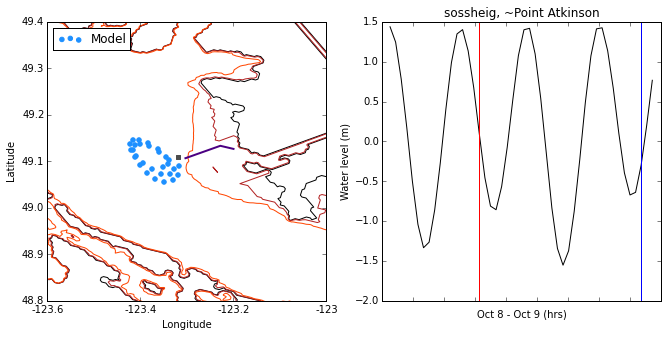

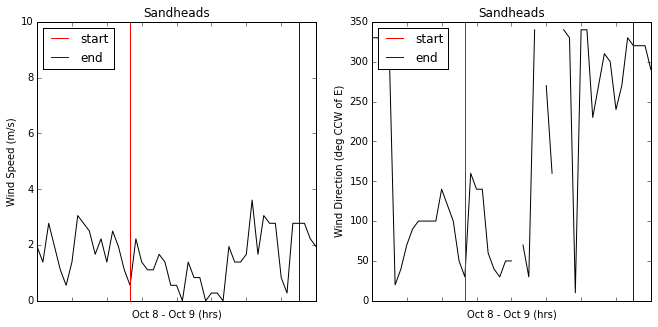

In [13]:
plotoct(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

In [14]:
lon212={}; lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['default']=o212.variables['traj_lon']
lat212['default']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['reduced_viscosity']=o212.variables['traj_lon']
lat212['reduced_viscosity']=o212.variables['traj_lat']

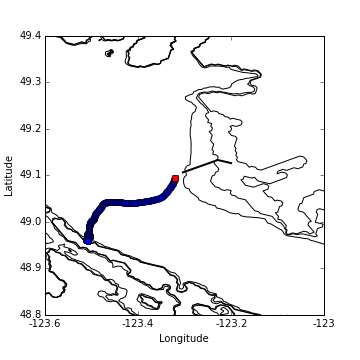

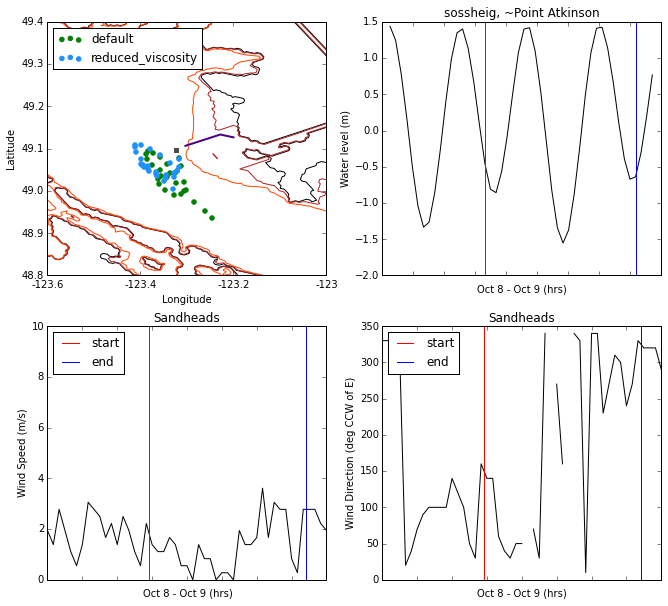

In [15]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')

In [16]:
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212=o212.variables['traj_lon']
lat212=o212.variables['traj_lat']

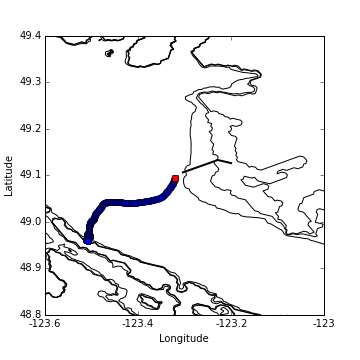

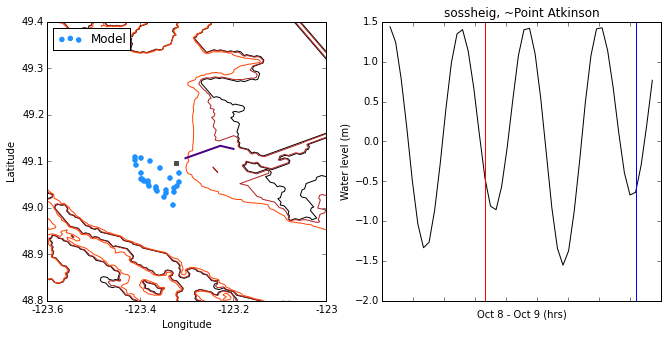

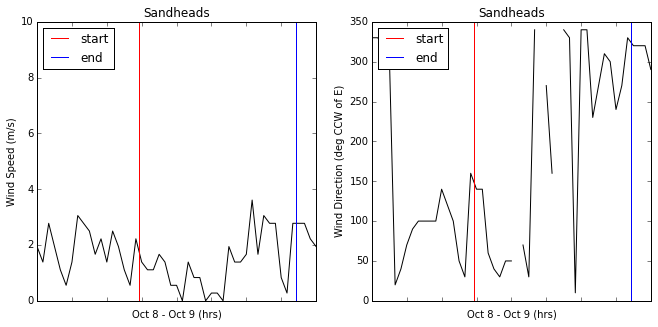

In [17]:
plotoct(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')

* reduced viscosity case seems promissing. Less mixing between two vertical layers...

# Comparison with nowcasts for reduced vertical viscosity from Oct8-10 

In [18]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['reduced_longriver']=o112.variables['traj_lon']
lat112['reduced_longriver']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10nowcastReduceViscosity/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['reduced_shortriver']=o112.variables['traj_lon']
lat112['reduced_shortriver']=o112.variables['traj_lat']

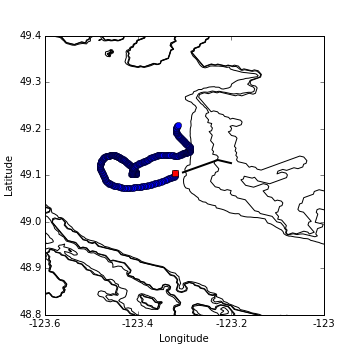

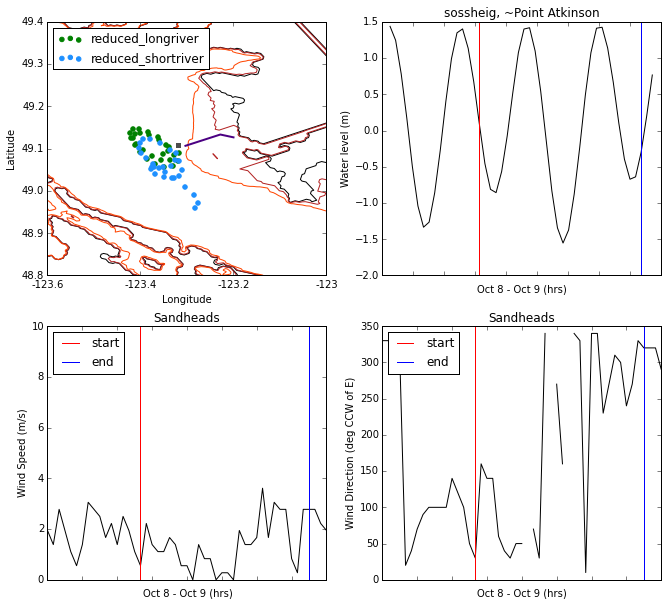

In [19]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

In [20]:
lon212={}; lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['reduced_longriver']=o212.variables['traj_lon']
lat212['reduced_longriver']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10nowcastReduceViscosity/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['reduced_shortriver']=o212.variables['traj_lon']
lat212['reduced_shortriver']=o212.variables['traj_lat']

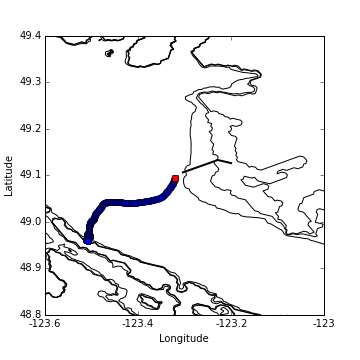

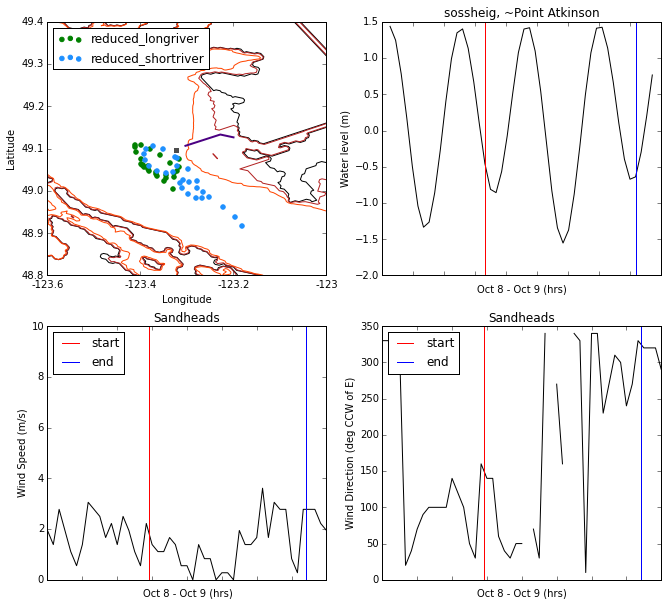

In [21]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')

* Results from above show we still need extended river channel although reducing vertical eddy viscosity is necessary.

# Comparison with reduced viscosity & diffusivity of short river

In [22]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_101e061e05/drop1/\
12/ariane_trajectories_qualitative.nc','r')
lon112['allreduced_long']=o112.variables['traj_lon']
lat112['allreduced_long']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_101e061e05shortriver/drop1/\
12/ariane_trajectories_qualitative.nc','r')
lon112['allreduced_short']=o112.variables['traj_lon']
lat112['allreduced_short']=o112.variables['traj_lat']

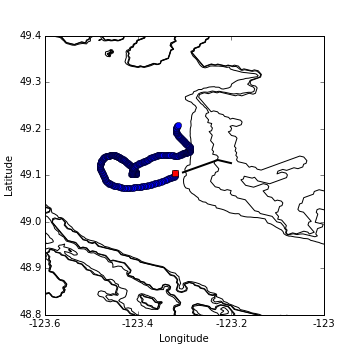

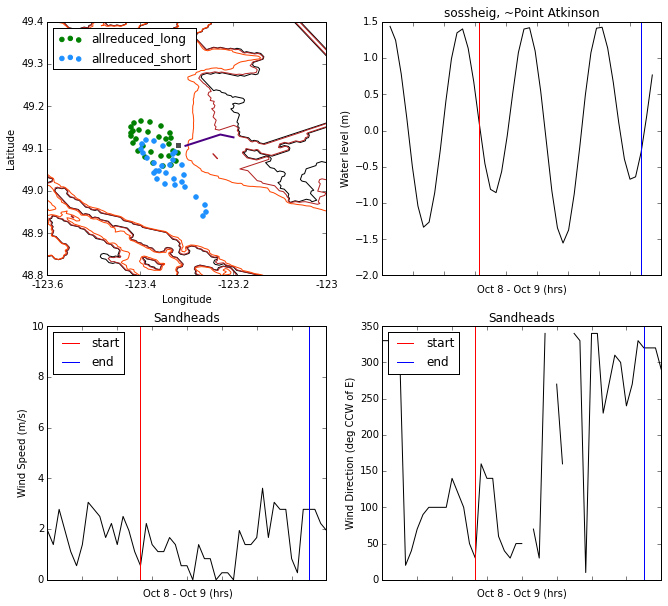

In [23]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

In [24]:
lon212={}; lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_101e061e05/drop2/\
12/ariane_trajectories_qualitative.nc','r')
lon212['allreduced_long']=o212.variables['traj_lon']
lat212['allreduced_long']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_101e061e05shortriver/drop2/\
12/ariane_trajectories_qualitative.nc','r')
lon212['allreduced_short']=o212.variables['traj_lon']
lat212['allreduced_short']=o212.variables['traj_lat']

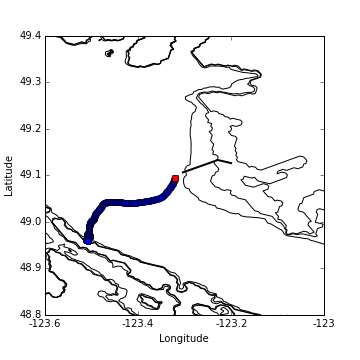

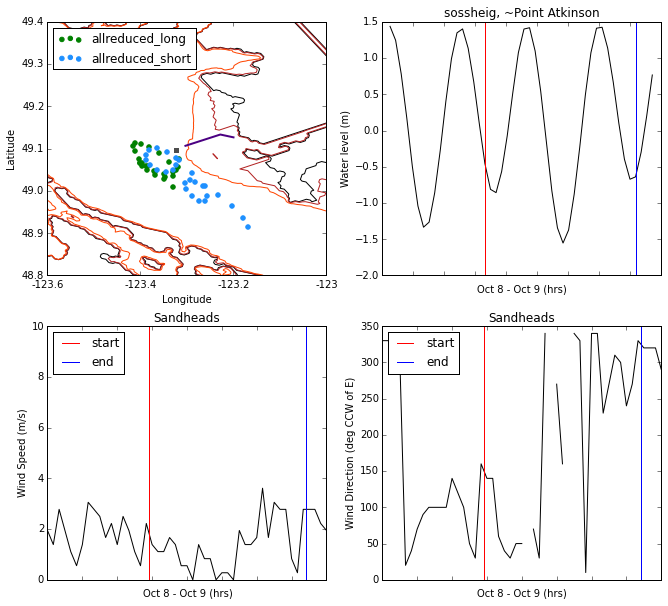

In [25]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')

* Even though reduced viscosity & diffusivity for short river channel, it still work worse than that with long river channel, in this case, long river should be reserved and applied in the surface current simulation.

# Comparison with no banks in the model from Sep25-Oct7 spin up and Oct8-10 simulation

In [26]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['default']=o112.variables['traj_lon']
lat112['default']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10nobanks/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['no_banks']=o112.variables['traj_lon']
lat112['no_banks']=o112.variables['traj_lat']

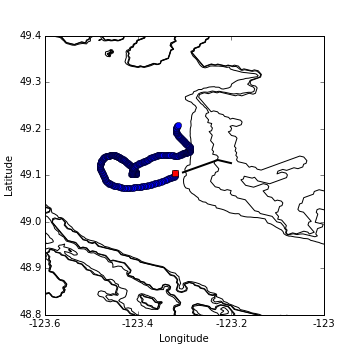

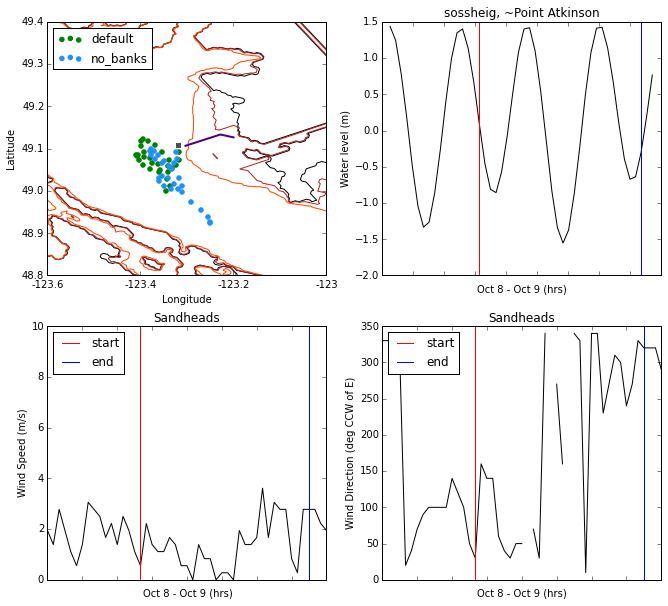

In [27]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

In [28]:
lon212={}; lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['default']=o212.variables['traj_lon']
lat212['default']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10nobanks/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['no_banks']=o212.variables['traj_lon']
lat212['no_banks']=o212.variables['traj_lat']

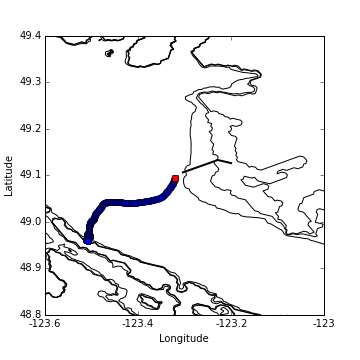

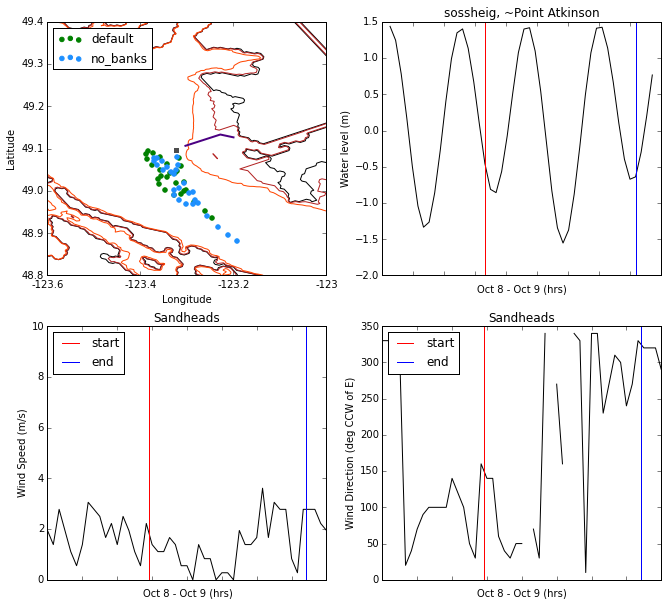

In [29]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')

* For no banks and no winds, particle moves further southward which is interesting.

# Comparison with nowcasts for reduced vertical viscosity from Sep25-Oct10

In [30]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['default']=o112.variables['traj_lon']
lat112['default']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10allreduceviscosity/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['all_reduced']=o112.variables['traj_lon']
lat112['all_reduced']=o112.variables['traj_lat']

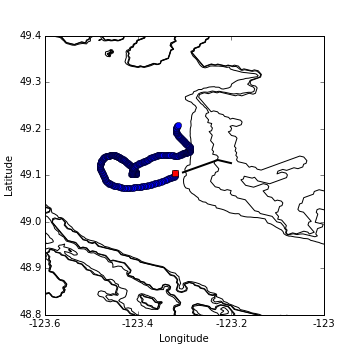

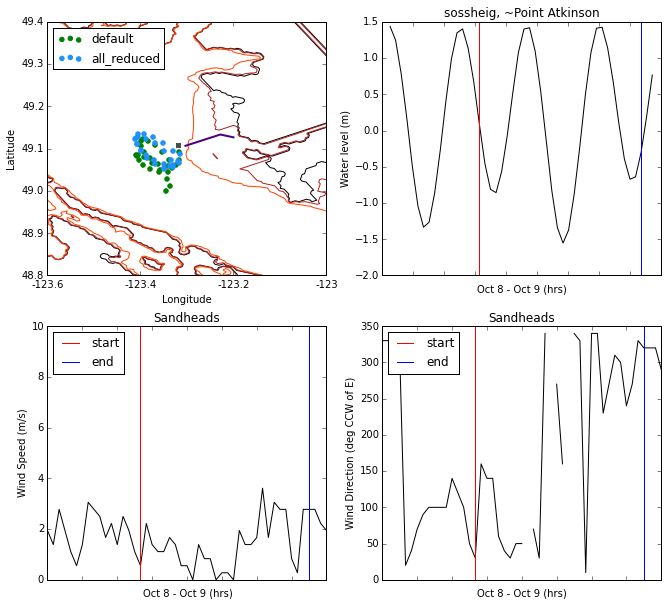

In [31]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

In [32]:
lon212={}; lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['default']=o212.variables['traj_lon']
lat212['default']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10allreduceviscosity/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['all_reduced']=o212.variables['traj_lon']
lat212['all_reduced']=o212.variables['traj_lat']

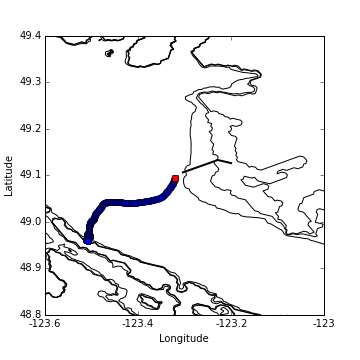

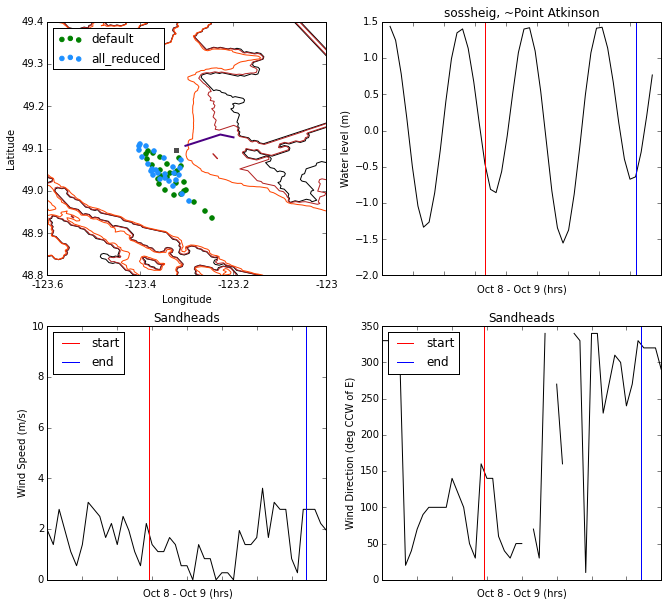

In [33]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')

# Comparison with no_wind case

In [34]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['wind']=o112.variables['traj_lon']
lat112['wind']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10nowind/drop1/\
ariane_trajectories_qualitative.nc','r')
lon112['no_wind']=o112.variables['traj_lon']
lat112['no_wind']=o112.variables['traj_lat']

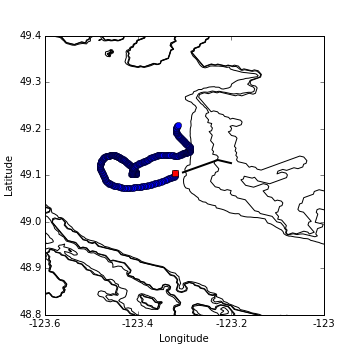

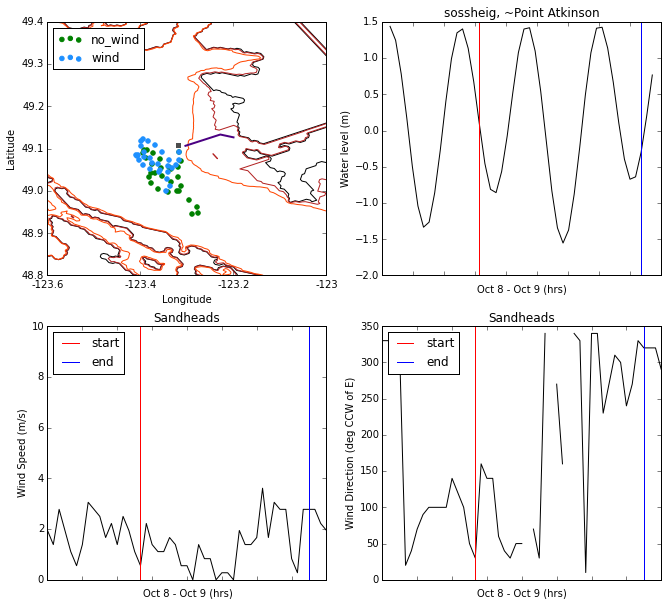

In [35]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

In [36]:
lon212={}; lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['wind']=o212.variables['traj_lon']
lat212['wind']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10nowind/drop2/\
ariane_trajectories_qualitative.nc','r')
lon212['no_wind']=o212.variables['traj_lon']
lat212['no_wind']=o212.variables['traj_lat']

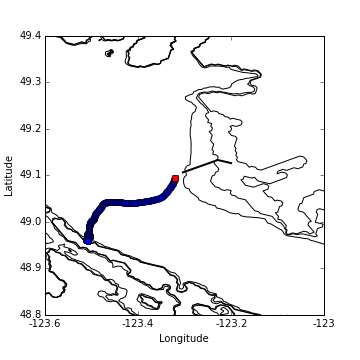

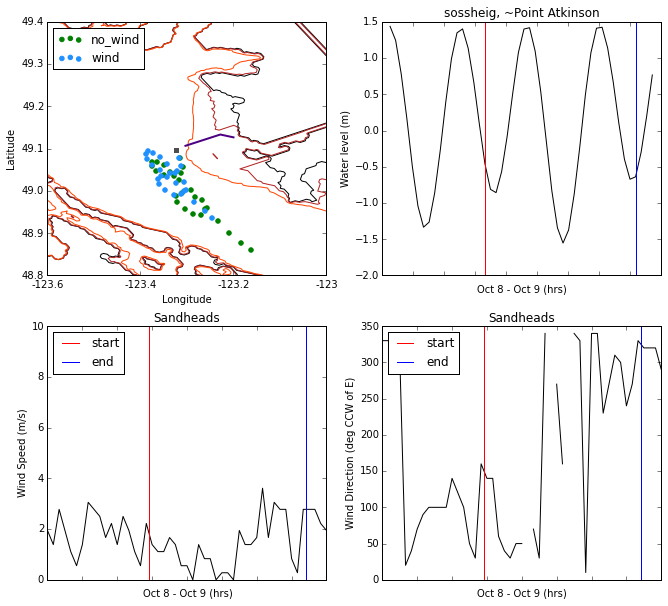

In [37]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')